In [47]:
library("ggplot2")
library("reshape2")

In [160]:
stories_ = data.frame(read.csv("Story_Cluster.txt", header = FALSE))#1:50,]
colnames(stories_) <- c('id2','cluster2','title','length')
stories_$title <- as.character(stories_$title)
stories_$length <- log2(stories_$length)

Warning message:
“Removed 5 rows containing missing values (position_stack).”Warning message:
“Removed 5 rows containing missing values (geom_text).”

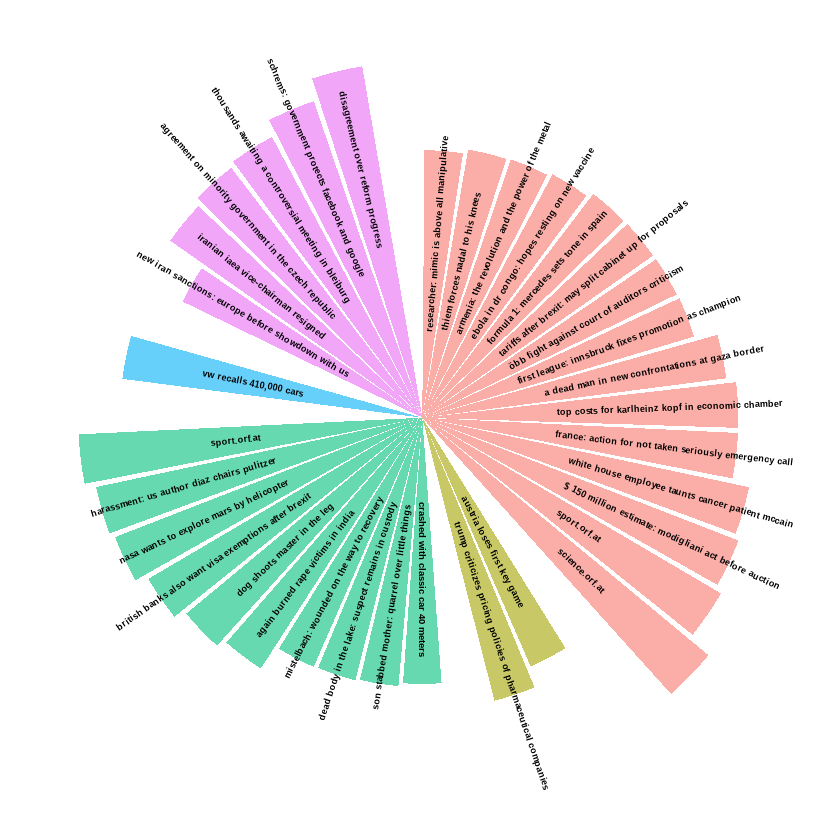

In [161]:
# library
library(tidyverse)

data <- stories_
 
# Order data:
data <- data %>% arrange(cluster2, length)

levels(data$cluster2) <- c(0,1,2,3,4)
 
# Set a number of 'empty bar' to add at the end of each group
empty_bar=1
to_add = data.frame( matrix(NA, empty_bar*nlevels(data$cluster2), ncol(data)) )
colnames(to_add) = colnames(data)
to_add$cluster2=rep(levels(data$cluster2), each=empty_bar)

data=rbind(data, to_add)
data=data %>% arrange(cluster2, length)
data$id=seq(1, nrow(data))
 
# Get the name and the y position of each label
label_data=data
number_of_bar=nrow(label_data)
angle= 90 - 360 * (label_data$id-0.5) /number_of_bar     # I substract 0.5 because the letter must have the angle of the center of the bars. Not extreme right(1) or extreme left (0)
label_data$hjust<-ifelse(angle < -90, 1, 0)
label_data$angle<-ifelse(angle < -90, angle+180, angle)

# Make the plot
p = ggplot(data=label_data, aes(x=as.factor(id), y=length, fill=cluster2)) +    #x=as.factor(id)   # Note that id is a factor. If x is numeric, there is some space between the first bar
  geom_bar(stat="identity", alpha=0.6) +
  theme_minimal() +
  theme(
    legend.position = "none",
    axis.text = element_blank(),
    axis.title = element_blank(),
    panel.grid = element_blank(),
    plot.margin = unit(rep(-1,5), "cm") 
  ) +
  coord_polar() + 
  geom_text(data=label_data, aes(x=id, y=length-6, label=title, hjust=hjust), color="black", fontface="bold",alpha=1, size=2, angle= label_data$angle, inherit.aes = FALSE ) 
 
p